# Étude de la conservation de l'énergie et de la continuité de la température résolue selon la forme de l'équation

In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path

In [2]:
from src.main import *
from src.main_discontinu import ProblemConserv2
from src.plot_fields import *

## Paramètres de la simulation

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

In [3]:
Delta = 10.0
lda_1 = 1.0
lda_2 = 10.0
rho_cp_1 = 1.0
rho_cp_2 = 100.0
markers = Bulles(markers=np.array([[0.4 * Delta, 0.6 * Delta]]), Delta=Delta)
alpha = (markers.markers[0,1] - markers.markers[0,0]) / Delta
v = 1.0
dt = 1.0
fo = 0.5

t_fin = 1.0
dx = 10.0**-1.0
cfl = 0.5
schema = "weno"
Formulation = [Problem, ProblemConserv2]

## Étude selon la formulation de l'équation pour un schéma temps Euler

Le premier cas correspond à une formulation en température, les 2 suivant à une formulation en énergie. Dans le premier on utilise $\rho C_p^{n+1}$ dans le 2ième on calcule $\rho C_p^* = \rho C_p^n + \Delta t \times \frac{1}{V_{cell}} \int_{S}{\rho C_p^n \underline{v}\cdot \underline{n} dS}$


TOF
===
dt fourier
0.0005000000000000001
Db / dx = 20
TOF dE*/dt* = -0.000000

EOFm
====
dt fourier
0.0005000000000000001
Db / dx = 20
EOFm dE*/dt* = 0.000000


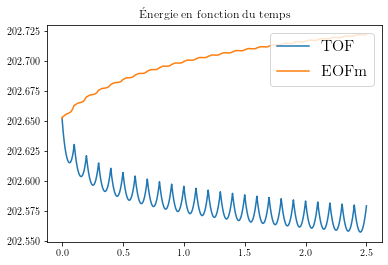

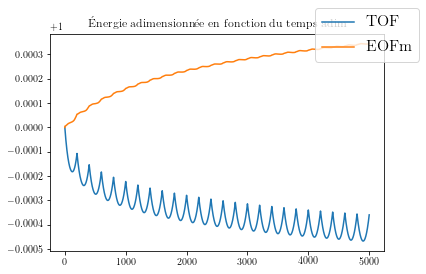

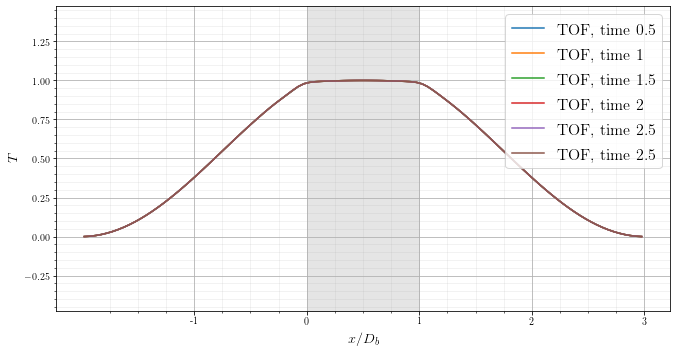

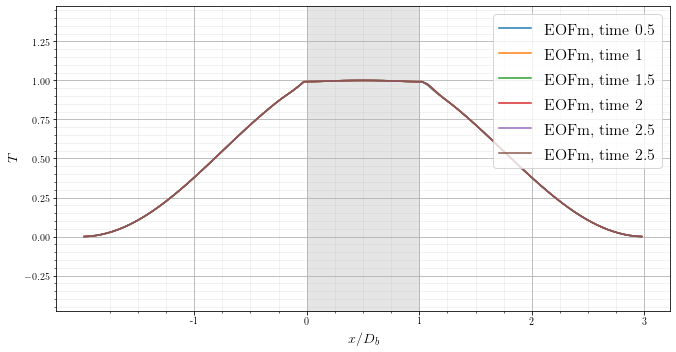

In [4]:
fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
fig2, ax2 = plt.subplots(1)
ax2.set_title("Énergie adimensionnée en fonction du temps adim")
for form in Formulation:
    phy_prop = PhysicalProperties(lda1=lda_1,
                                  lda2=lda_2,
                                  rho_cp1=rho_cp_1,
                                  rho_cp2=rho_cp_2,
                                  Delta=Delta,
                                  diff=0.,
                                  v=v
                                 )
    num_prop = NumericalProperties(time_scheme='euler', 
                                   schema=schema, 
                                   Delta=Delta, 
                                   dx=dx, 
                                   cfl=cfl, 
                                   fo=fo, 
                                   dt=dt
                                  )
    prob = form(
        get_T,
        markers,
        phy_prop=phy_prop,
        num_prop=num_prop,
    )
    t, e = prob.timestep(
        n=5000, number_of_plots=5, plotter=Plotter("decale")
    )
    l = ax1.plot(t, e, label=prob.name)
    ax1.legend()
    n = len(e)
    i0 = int(n / 5)
    ax2.plot(t / prob.dt, e / e[0], label=prob.name)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / e[0]  # on a mult
    # par Dt / rho_cp_l T_l V
    print(prob.name, "dE*/dt* = %f" % dedt_adim)
le = fig2.legend()

## Étude selon la formulation de l'équation pour un schéma temps RK4

Le premier cas correspond à une formulation en température, le suivant à une formulation en énergie. Dans cette formulation en énergie on écrit :
    
$$dT = \frac{1}{V} \int_{\Delta t}{\frac{1}{\rho C_p} \left[ T\oint_{S}{\rho C_p \underline{v}\cdot\underline{n} dS} - \oint_{S}{\rho C_p T \underline{v}\cdot\underline{n} dS} + \oint_{S}{\lambda \nabla T \cdot\underline{n} dS}\right]dt}$$


TOF
===
dt fourier
0.0005000000000000001
Db / dx = 20
TOF dE*/dt* = -0.000000

EOFm
====
dt fourier
0.0005000000000000001
Db / dx = 20
EOFm dE*/dt* = 0.000000


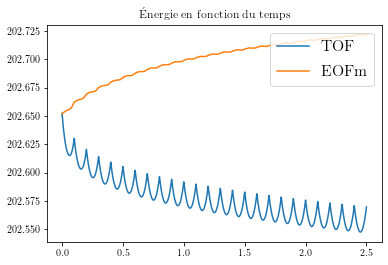

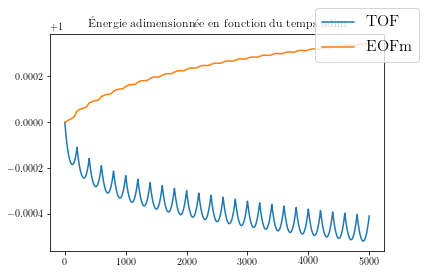

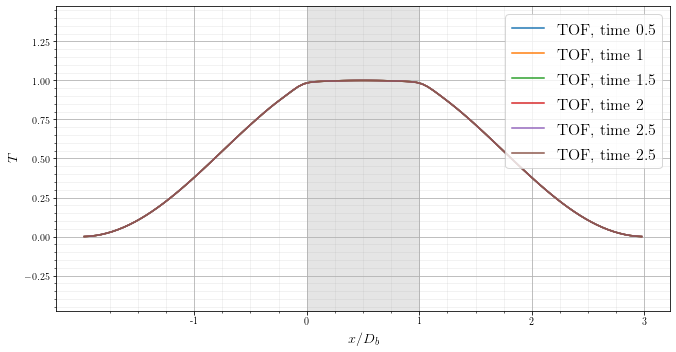

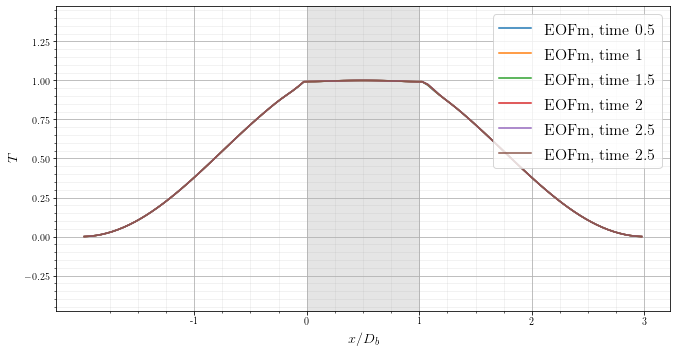

In [8]:
fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
fig2, ax2 = plt.subplots(1)
ax2.set_title("Énergie adimensionnée en fonction du temps adim")
for form in Formulation:
    phy_prop = PhysicalProperties(lda1=lda_1,
                                  lda2=lda_2,
                                  rho_cp1=rho_cp_1,
                                  rho_cp2=rho_cp_2,
                                  Delta=Delta,
                                  diff=0.,
                                  v=v
                                 )
    num_prop = NumericalProperties(time_scheme='rk4', 
                                   schema=schema, 
                                   Delta=Delta, 
                                   dx=dx, 
                                   cfl=cfl, 
                                   fo=fo, 
                                   dt=dt
                                  )
    prob = form(
        get_T,
        markers,
        phy_prop=phy_prop,
        num_prop=num_prop,
    )
    t, e = prob.timestep(
        n=5000, number_of_plots=5, plotter=Plotter("decale")
    )
    l = ax1.plot(t, e, label=prob.name)
    ax1.legend()
    n = len(e)
    i0 = int(n / 5)
    ax2.plot(t / prob.dt, e / e[0], label=prob.name)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / e[0]  # on a mult
    # par Dt / rho_cp_l T_l V
    print(prob.name, "dE*/dt* = %f" % dedt_adim)
le = fig2.legend()